## Universidad del Valle de Guatemala
### Data science 1
### Laboratorio 2

Integrantes:
* Andrei Portales 19825
* Christian Perez 19710
* Sofía Rueda
* Oscar Ramos

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

from prophet import Prophet

In [3]:
data = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


### Analisis Exploratorio

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
data.shape

(577462, 4)

In [6]:
explore(data)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
AverageTemperature,float64,544811,32651,0.057,71085,-37.658,10.025,20.901,25.814,38.842,17.193354,20.901,10.953966,-1.114297
AverageTemperatureUncertainty,float64,545550,31912,0.055,8979,0.052,0.323,0.571,1.206,15.003,1.019057,0.571,1.20193,3.142598
Country,object,577462,0,0.000,243,Afghanistan,-,-,-,Åland,-,-,-,-
dt,object,577462,0,0.000,3239,1743-11-01,-,-,-,2013-09-01,-,-,-,-


In [7]:
profiler = ProfileReport(data)

In [8]:
# Reporte a html para poder visualizarlo en un navegador
html = profiler.to_html()
file = open("reporte.html", "w", encoding="utf-8")
file.write(html)
file.close()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


In [112]:
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)
data.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [10]:
#get month from date
data['month'] = data['dt'].dt.month

In [11]:
# month were average temperature is highest
mes_mayortemp = data.groupby('month').mean()['AverageTemperature']

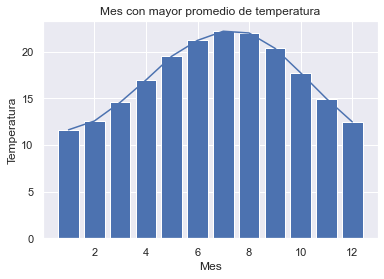

In [12]:
# graph of month with highest average temperature
plt.bar(mes_mayortemp.index, mes_mayortemp)
plt.plot(mes_mayortemp)
plt.title('Mes con mayor promedio de temperatura')
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.show()

#### Se puede observar que en promedio, los meses con mayor temperatura son julio y agosto, mientras que enero, febrero y diciembre son los meses con menor temperatura

In [13]:
#group by country and get average temperature
data_country = data.groupby('Country')['AverageTemperature'].mean()

In [14]:
#group by contry and month and get average temperature
data_country_month = data.groupby(['Country', 'month'])['AverageTemperature'].mean()

In [15]:
data_country_month.sort_values(ascending=True).head(10)

Country    month
Greenland  2       -30.662555
           1       -30.594199
Denmark    2       -30.034901
           1       -29.981000
Greenland  12      -29.638516
Denmark    12      -29.016274
Greenland  3       -28.912654
Denmark    3       -28.289869
Greenland  11      -26.391116
Russia     1       -25.823145
Name: AverageTemperature, dtype: float64

#### Agrupando por país y mes, se puede ver que las temperaturas más bajas, en promedio, las tiene Groenlandia en los meses de enero y febrero, seguido por Dinamarca en esos mismos meses. 

In [16]:
data_country_month.sort_values(ascending=False).head(10)

Country               month
Kuwait                7        36.113628
United Arab Emirates  7        35.745605
Kuwait                8        35.588442
United Arab Emirates  8        35.222535
Qatar                 7        35.112778
Bahrain               7        34.828411
Qatar                 8        34.587754
United Arab Emirates  6        34.517833
Kuwait                6        34.439919
Bahrain               8        34.395857
Name: AverageTemperature, dtype: float64

#### Agrupando por país y mes, se puede ver que las temperaturas más altas, en promedio, las tiene Kuwait en el mes de julio, seguido por los Emiratos Arabes Unidos en el mismo mes.

In [17]:
data.drop(columns=['month'], inplace=True)

In [18]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [40]:
uni = data[['dt', 'AverageTemperature']]
uni.dropna(inplace=True)
uni

d:\universidad\2022 - segundo semestre\Data Science 1\lab2_datascience\venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dt,AverageTemperature
0,1743-11-01,4.384
5,1744-04-01,1.530
6,1744-05-01,6.702
7,1744-06-01,11.609
8,1744-07-01,15.342
...,...,...
577456,2013-04-01,21.142
577457,2013-05-01,19.059
577458,2013-06-01,17.613
577459,2013-07-01,17.000


### Elegimos un inicio, fin y frecuencia para nuestra serie

* inicio: 2005
* fin: 2013
* frecuencia: mensual

In [135]:
INICIO = 2005
FINAL = 2013

interval = uni[uni['dt'].dt.year >= INICIO]
interval = interval[interval['dt'].dt.year <= FINAL]
interval

,dt,AverageTemperature
3134,2005-01-01,1.379
3135,2005-02-01,-1.899
3136,2005-03-01,-3.197
3137,2005-04-01,3.610
3138,2005-05-01,7.593
...,...,...
577456,2013-04-01,21.142
577457,2013-05-01,19.059
577458,2013-06-01,17.613
577459,2013-07-01,17.000


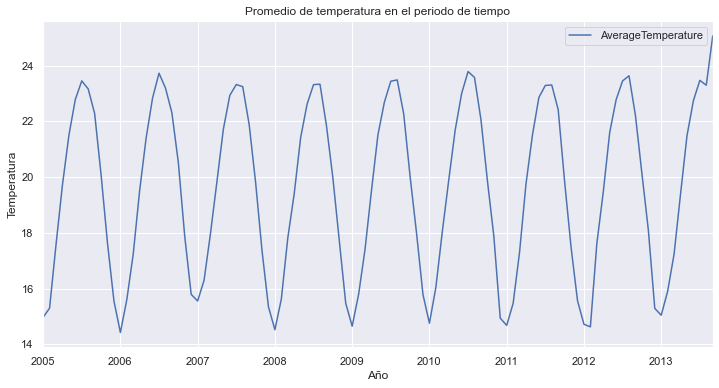

In [144]:
# Agrupar por mes y obtener el promedio de temperatura y graficarlo
interval_mean = interval.groupby('dt').mean()
interval_mean.plot(figsize=(12, 6))
plt.title('Promedio de temperatura en el periodo de tiempo')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.show()


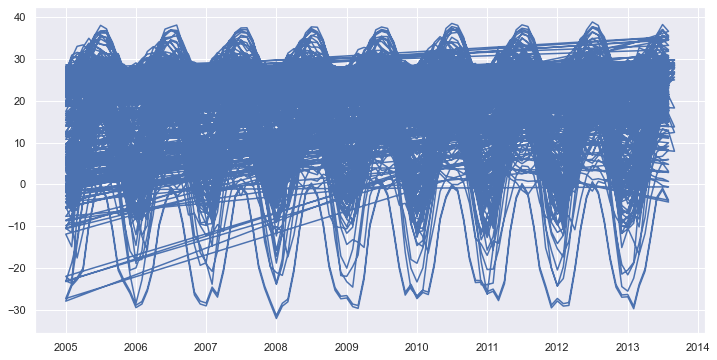

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(interval['dt'], interval['AverageTemperature'])

## Componentes de la serie

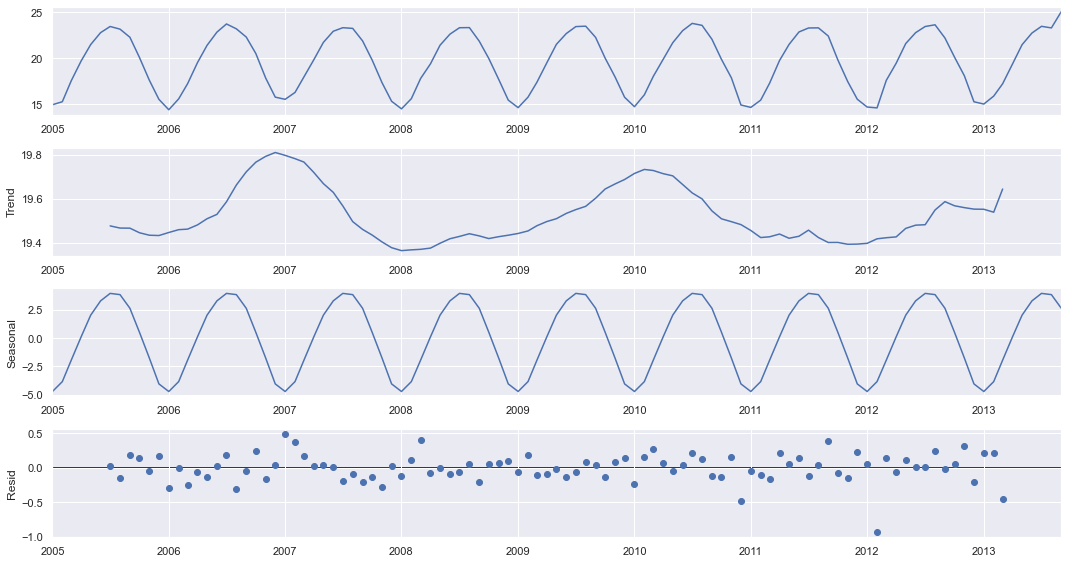

In [149]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(interval_mean, model='additive')
fig = decomposition.plot()
plt.show()

### Thumb Rule for Statistical Tests

* ADF: Autoregressive Determination Factors -> si el valor de p is menor que el valor critico, la serie es estacionaria
* OSCB: Order Statistics Check -> si el valor es menor a 0.64, la serie es estacionaria

In [151]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(interval_mean))

Results of Dickey-Fuller Test:
Test Statistic                 -1.869900
p-value                         0.346351
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                 -1.869900
p-value                         0.346351
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64
None


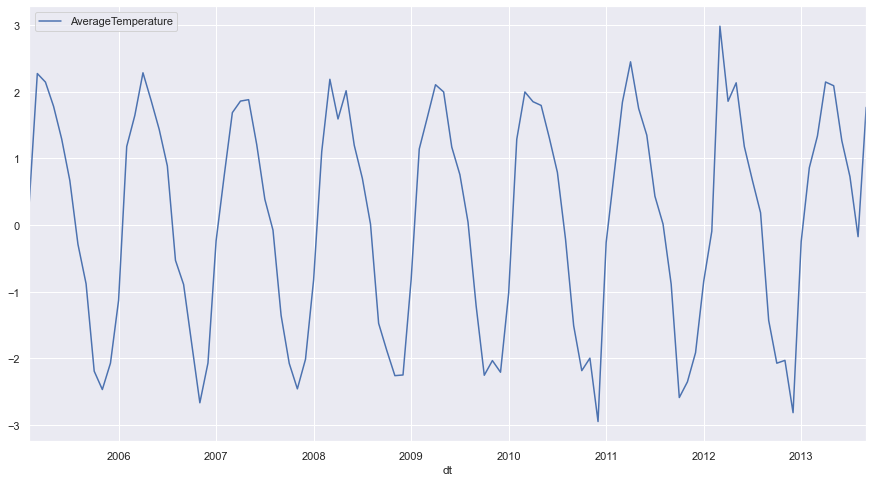

In [154]:
ts_t_adj = interval_mean - interval_mean.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

print(adf_test(interval_mean))

Tomando es cuenta estas grafica podemos darnos cuenta que estos datos no tienen una tendencia notable ya que esta se mantiene constante o no varia mucho. Tambien con los diferentes tests hechos podemos darnos cuenta que nuestra serie es estacionaria, esto ya que los valores siempre tienen el mismo comportamiento, siempre es casi igual todos los años del intervalo. Ademas que en la prueba de OSCB, el valor es menor a 0.64, esto significa que la serie es estacionaria.

<AxesSubplot:xlabel='dt'>

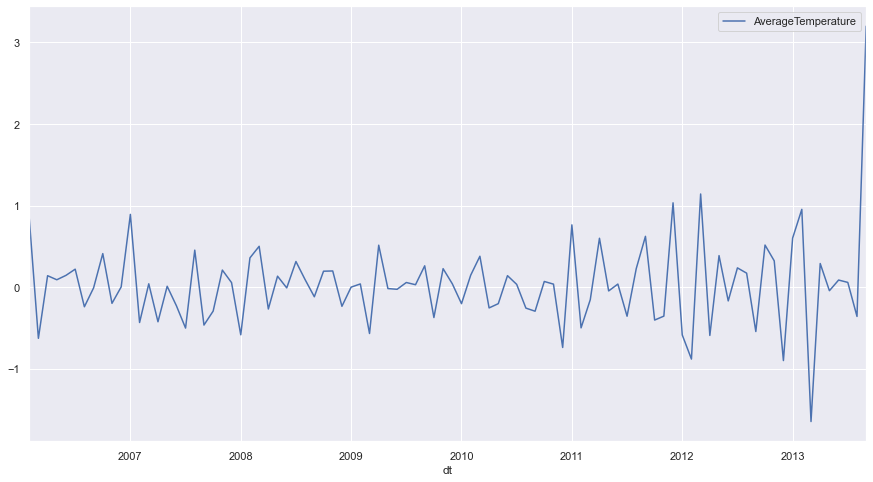

In [155]:
ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

### Valores de p, d, q

In [140]:
d = 1
p = 10
q = 7

## Probando diferentes modelos

In [141]:
from util_function import *

In [ ]:
nombre = 'modelo_temperatura'

encontrar_mejor_solucion(interval, nombre, metodo = "promedio")
encontrar_mejor_solucion(interval, nombre, metodo = "sarima")
encontrar_mejor_solucion(interval, nombre, metodo = "exp")